In [22]:
import pickle as pkl
from hc_lib.plots.figlib import FigureLibrary
import numpy as np
import seaborn as sbn
import copy
import matplotlib as mpl
import matplotlib.pyplot as plt
from hc_lib.plots.container import PostResult

In [23]:
base = '/lustre/cosinga/hcolor/output/'
path = base + 'species_test_tng100B_099S_0A_800R/results/'
galfile = pkl.load(open(path + 'galaxygrid_tng100B_099S_0A_800R.pkl_rlib.pkl', 'rb'))
flib_og = FigureLibrary(galfile, 'pk')


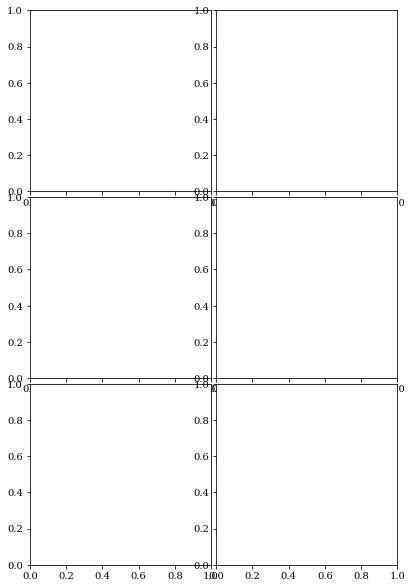

In [30]:
flib = copy.copy(flib_og)
flib.createFigGrid(3,2, panel_length = 2.5)
fig, panels = flib.getFig()

In [31]:
ip = {}; rmp = {}
ip['is_auto'] = True
ip['color_cut'] = ['0.60', 'None']
figarr = flib.arrangeResults(ip, 'color', ['resolved', 'blue', 'red'], 'space', ['real', 'redshift'], 'species', rmp)
dim = flib.getDim()

In [32]:
colors = {'resolved':'gray', 'red':'red', 'blue':'blue'}
dim = flib.getDim()
for i in range(dim[0]):
    for j in range(dim[1]):
        idx = (i, j)
        c = figarr[idx][0].props[flib.rowprop]
        flib.plotLine(idx, {'species':'stmass'}, 
                      line_kwargs = {'color':colors[c], 'label':'Stellar', 'linestyle':'-'})
        
        flib.plotLine(idx, {'species':'total'}, 
                      line_kwargs = {'color':colors[c], 'label':'All Species', 'linestyle':'--'})


In [33]:
# axes
flib.xLimAdjustToNyquist()
flib.flushYAxisToData()
flib.matchAxisLimits()
flib.logAxis()

# ticks
flib.removeDefaultTickLabels()
flib.changeTickParams({'labelsize':12})

# labels
colkw = {'fontsize':14}
legkw = {'fontsize':12, 'loc':'lower left'}
# flib.colLabels(['Real Space', 'Redshift Space'])
axiskw = {'fontsize':14}
xpos = [0.5, flib.yborder[0]/2/flib.figsize[1]]
ypos = [flib.xborder[0]/3/flib.figsize[0], 0.5]
flib.colLabels(['Real Space', 'Redshift Space'], txt_kwargs = colkw)
flib.addLegend(kwargs = legkw)
flib.axisLabel('x', pos = xpos, txt_kwargs = axiskw)
axiskw['rotation'] = 'vertical'
flib.axisLabel('y', pos = ypos, subscript = '\\rm{gal}', txt_kwargs = axiskw)

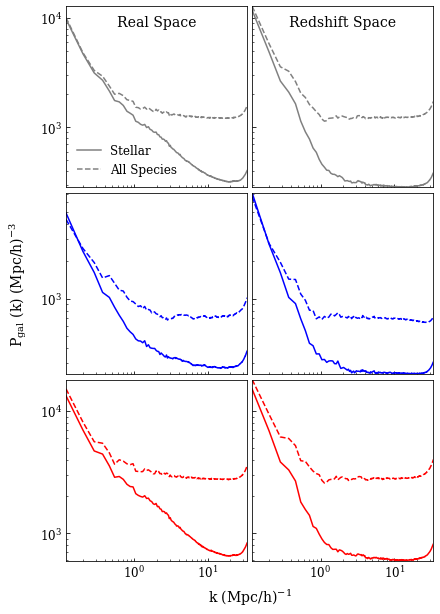

In [34]:
fig

In [35]:
fig.savefig('species_tests.pdf')